In [285]:
# packages to load 
# Check the versions of libraries
# Python version
import warnings
warnings.filterwarnings('ignore')
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
import numpy
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# numpy
import numpy as np # linear algebra
print('numpy: {}'.format(np.__version__))
# pandas
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
print('pandas: {}'.format(pd.__version__))
import seaborn as sns
print('seaborn: {}'.format(sns.__version__))
sns.set(color_codes=True)
import matplotlib.pyplot as plt
print('matplotlib: {}'.format(matplotlib.__version__))
%matplotlib inline
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
%matplotlib inline
from sklearn.metrics import accuracy_score
# Importing metrics for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from pandas import get_dummies
from sklearn.cross_validation import train_test_split

DATA_DIR = '../../../data/'
print(os.listdir(DATA_DIR))

Python: 3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
scipy: 1.1.0
matplotlib: 2.2.2
numpy: 1.14.3
pandas: 0.23.0
seaborn: 0.8.1
matplotlib: 2.2.2
sklearn: 0.19.1
['CleanLoLMatchHistory2.csv', 'openaq.csv', 'CleanLoLMatchHistory3.csv', '.DS_Store', 'LoLMatchHistory.txt', 'CleanLoLMatchHistory.csv', 'LoL Match Making Statistics.ipynb', '.ipynb_checkpoints', 'CleanLoLMatchHistory3.xlsx', 'LolUpdatedStats.txt', 'CleanLoLMatchHistoryUpdate.csv']


In [286]:
filename = DATA_DIR + 'CleanLoLMatchHistory2.csv'
df_read = pd.read_csv(filename, parse_dates=['Date'])

df_read.columns = df_read.columns.str.lower().str.replace(' ', '_')
df_read.head()

,level,champion,score,game_mode,creep_score,gold,minutes,date,rank,experience_gained,kills,deaths,assists,game_status
0,15,Vayne,C / +188 XP,Summoner's Rift,169,9.8k,33:44:00,2018-10-14,C,188,3,6,6,-1
1,16,Shen,B- / +223 XP,Summoner's Rift,144,11.8k,40:20:00,2018-10-13,B-,223,5,7,15,-1
2,12,Shen,A-,Summoner's Rift,39,6.2k,25:50:00,2018-10-13,A-,0,0,0,13,1
3,12,Vayne,A+ / +146 XP,Summoner's Rift,137,9.9k,21:05,2018-10-13,A+,146,9,2,8,1
4,12,Vayne,B+ / +144 XP,Summoner's Rift,86,8.4k,20:53,2018-10-13,B+,144,6,2,6,1


In [287]:
filename = DATA_DIR + 'CleanLoLMatchHistoryUpdate.csv'
df_read_2 = pd.read_csv(filename, parse_dates=['date'])
df_read_2.head()

,level,champion,score,game_mode,kda,creep_score,gold,minutes,date,rank,experience_gained,kills,deaths,assists,game_status
0,8,Thresh,A- / +508 XP,Summoner's Rift,1/0/3,0,4300,15:20,2018-10-17,A-,508,1,0,3,1
1,2,Shen,C,Summoner's Rift,0/0/1,0,737,3:17,2018-10-17,C,0,0,0,1,0
2,16,Heimerdinger,S- / +172 XP,Summoner's Rift,11/0/3,147,11000,25:06:00,2018-10-17,S-,172,11,0,3,1
3,14,Kalista,C / +201 XP,Summoner's Rift,01/07/2004,205,9900,36:12:00,2018-10-17,C,201,1,7,4,-1
4,14,Shen,A- / +172 XP,Summoner's Rift,04/02/2014,105,8900,25:04:00,2018-10-17,A-,172,4,2,14,1


In [288]:
# Concatenate
frames = [df_read, df_read_2]
df = pd.concat(frames, sort=True, ignore_index=True)
df

,assists,champion,creep_score,date,deaths,experience_gained,game_mode,game_status,gold,kda,kills,level,minutes,rank,score
0,6,Vayne,169,2018-10-14,6,188,Summoner's Rift,-1,9.8k,NaN,3,15,33:44:00,C,C / +188 XP
1,15,Shen,144,2018-10-13,7,223,Summoner's Rift,-1,11.8k,NaN,5,16,40:20:00,B-,B- / +223 XP
2,13,Shen,39,2018-10-13,0,0,Summoner's Rift,1,6.2k,NaN,0,12,25:50:00,A-,A-
3,8,Vayne,137,2018-10-13,2,146,Summoner's Rift,1,9.9k,NaN,9,12,21:05,A+,A+ / +146 XP
4,6,Vayne,86,2018-10-13,2,144,Summoner's Rift,1,8.4k,NaN,6,12,20:53,B+,B+ / +144 XP
5,12,Shen,28,2018-10-13,2,557,Summoner's Rift,1,7.7k,NaN,3,12,22:50,NaN,+557 XP
6,0,Vayne,78,2018-10-13,5,100,Summoner's Rift,-1,4.3k,NaN,0,8,17:34,C-,C- / +100 XP
7,6,Vayne,124,2018-10-13,3,0,Summoner's Rift,1,14.8k,NaN,20,15,30:23:00,A-,A-
8,11,Thresh,41,2018-10-12,8,0,Custom,-1,8.3k,NaN,0,13,37:01:00,NaN,NaN
9,7,Vayne,269,2018-10-12,6,0,Custom,1,19.0k,NaN,16,17,35:28:00,NaN,NaN


In [289]:
df = df_read.copy()
def parse_gold(x):
    if('k' in x):
        x = x.replace('k','')
        return float(x) * 1000
    return float(x)
        
def clean_whitespace(x):
    x = str(x)
    if(' ' in x):
        return x.replace(' ', '')
    return x

def parse_rank(x):
    list_ranks = ['S+','S','S-','A+','A','A-','B+','B','B-','C+','C','C-','D+','D','D-']
    
    if(x == 'nan'):
        return np.nan
    if(x != np.nan):
        return list_ranks.index(x) + 1
    return x

df['rank'].fillna(np.nan)
df['gold'] = df['gold'].apply(parse_gold)

df['rank'] = df['rank'].apply(clean_whitespace)
df['rank'] = df['rank'].apply(parse_rank)



In [290]:
from sklearn.model_selection import train_test_split

def win_or_loss_only(x):
    if (x == 0):
        return -1
    return x

print(df.head())
df_train = df.copy()
df_train = df[['level','champion','creep_score','gold','rank','experience_gained','kills','deaths','assists','game_status']]
df_train['game_status'] = df_train['game_status'].apply(win_or_loss_only)

X, y = df_train_facet.loc[:, df_train.columns != 'game_status'], df_train_facet.loc[:,'game_status']

X_train, x_test = train_test_split(df_train, test_size = 0.2, random_state = 42)
# X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

   level champion         score        game_mode  creep_score     gold  \
0     15    Vayne   C / +188 XP  Summoner's Rift          169   9800.0   
1     16     Shen  B- / +223 XP  Summoner's Rift          144  11800.0   
2     12     Shen            A-  Summoner's Rift           39   6200.0   
3     12    Vayne  A+ / +146 XP  Summoner's Rift          137   9900.0   
4     12    Vayne  B+ / +144 XP  Summoner's Rift           86   8400.0   

    minutes       date  rank  experience_gained  kills  deaths  assists  \
0  33:44:00 2018-10-14  11.0                188      3       6        6   
1  40:20:00 2018-10-13   9.0                223      5       7       15   
2  25:50:00 2018-10-13   6.0                  0      0       0       13   
3     21:05 2018-10-13   4.0                146      9       2        8   
4     20:53 2018-10-13   7.0                144      6       2        6   

   game_status  
0           -1  
1           -1  
2            1  
3            1  
4            1  


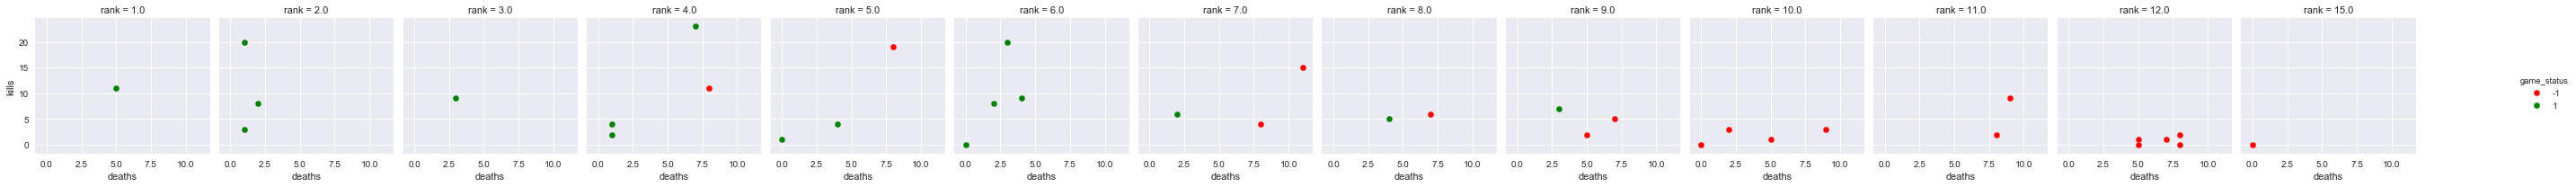

In [291]:
# Modify the graph above by assigning each species an individual color.
g = sns.FacetGrid(X_train, hue="game_status", col="rank", margin_titles=True,
                  palette={1:"green", -1:"red"})
g=g.map(plt.scatter, "deaths", "kills",edgecolor="w").add_legend();

14


<Figure size 1080x1080 with 0 Axes>

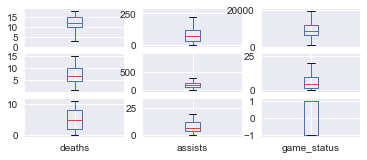

<Figure size 1080x1080 with 0 Axes>

In [292]:
print(len(df.columns))
X_train.plot(kind='box', subplots=True, layout=(5,3), sharex=False, sharey=False)
plt.figure(figsize=(15,15))

#This gives us a much clearer idea of the distribution of the input attributes:

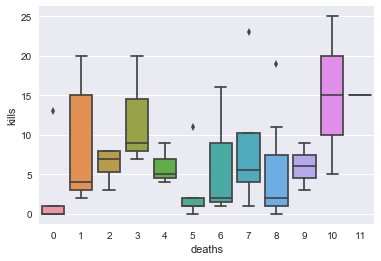

In [293]:
# To plot the species data using a box plot:

sns.boxplot(x="deaths", y="kills", data=X_train )
plt.show()

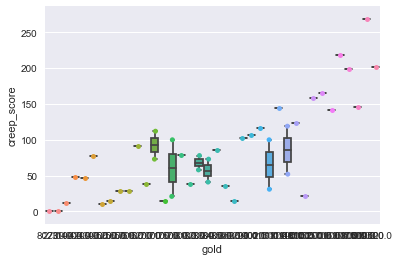

In [294]:
# Use Seaborn's striplot to add data points on top of the box plot 
# Insert jitter=True so that the data points remain scattered and not piled into a verticle line.
# Assign ax to each axis, so that each plot is ontop of the previous axis. 

ax= sns.boxplot(x="gold", y="creep_score", data=X_train)
ax= sns.stripplot(x="gold", y="creep_score", data=X_train, jitter=True, edgecolor="gray")
plt.show()

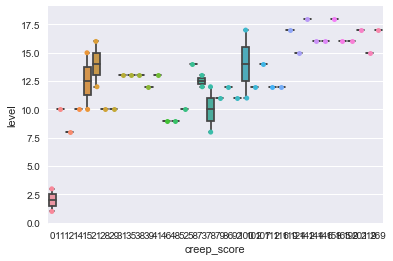

In [295]:
# Tweek the plot above to change fill and border color color using ax.artists.
# Assing ax.artists a variable name, and insert the box number into the corresponding brackets

ax= sns.boxplot(x="creep_score", y="level", data=X_train)
ax= sns.stripplot(x="creep_score", y="level", data=X_train, jitter=True, edgecolor="gray")

boxtwo = ax.artists[2]
boxtwo.set_facecolor('red')
boxtwo.set_edgecolor('black')
boxthree=ax.artists[1]
boxthree.set_facecolor('yellow')
boxthree.set_edgecolor('black')

plt.show()

<Figure size 432x288 with 0 Axes>

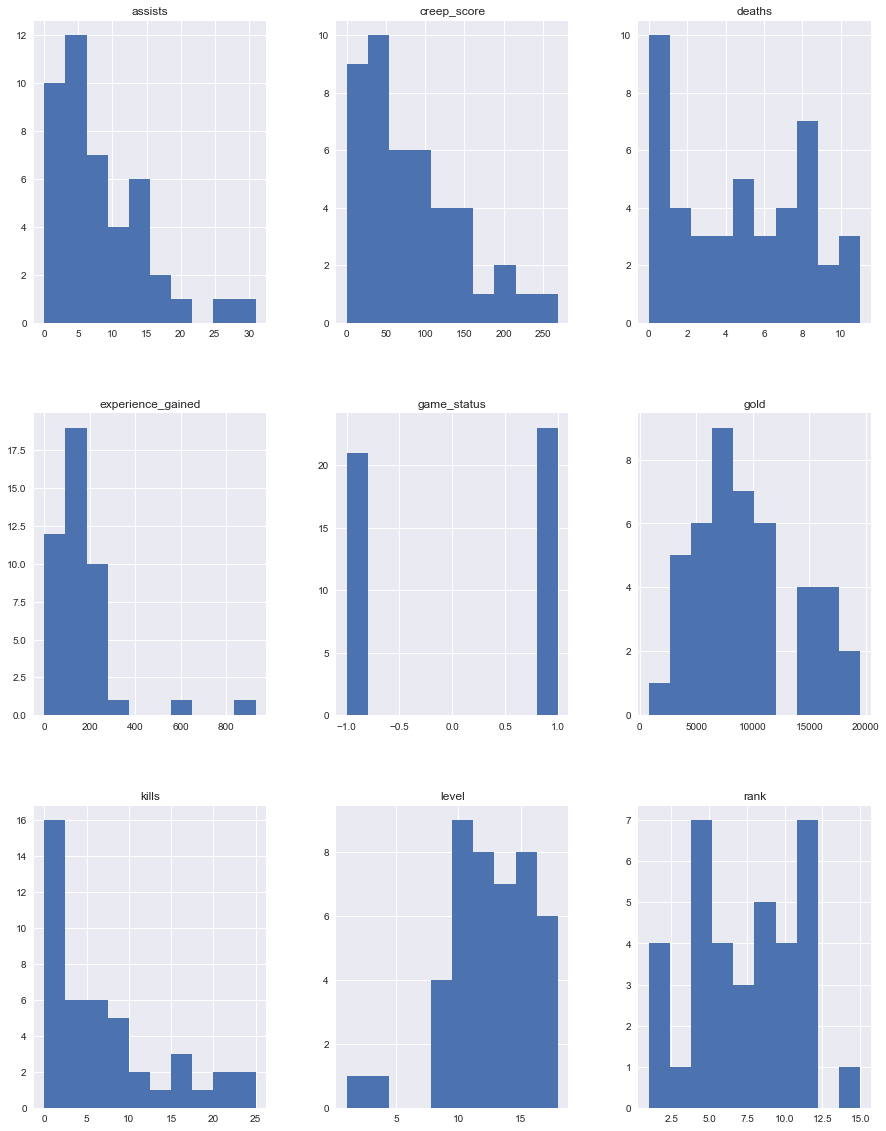

<Figure size 432x288 with 0 Axes>

In [296]:
# histograms
X_train.hist(figsize=(15,20))
plt.figure()

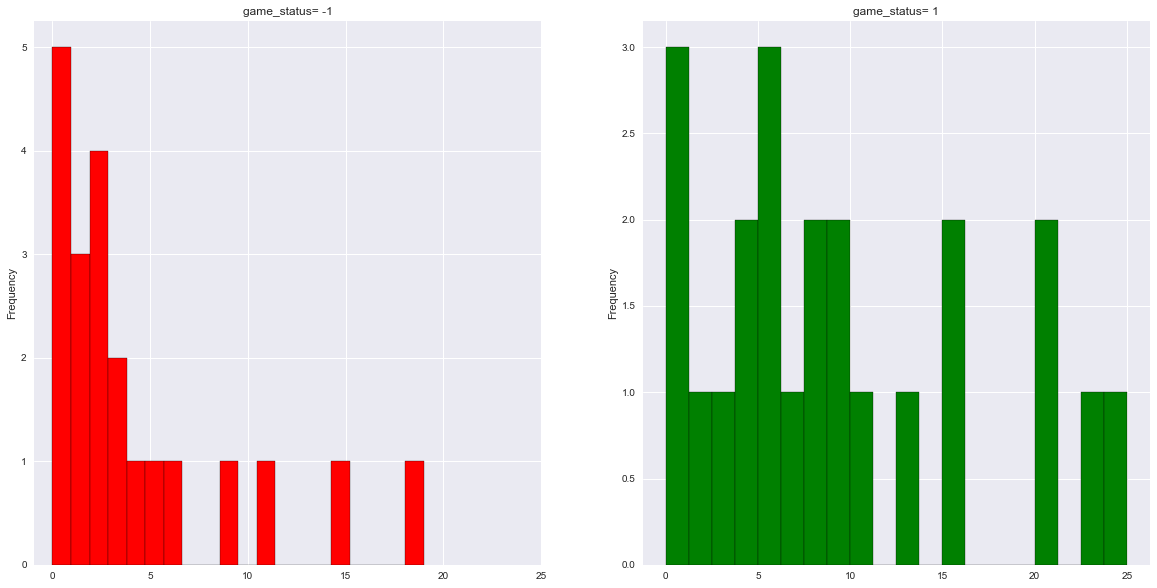

In [300]:
f,ax=plt.subplots(1,2,figsize=(20,10))
X_train[X_train['game_status']==-1].kills.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('game_status= -1')
x1=list(range(0,30,5))
ax[0].set_xticks(x1)
X_train[X_train['game_status']==1].kills.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('game_status= 1')
x2=list(range(0,30,5))
ax[1].set_xticks(x2)
plt.show()

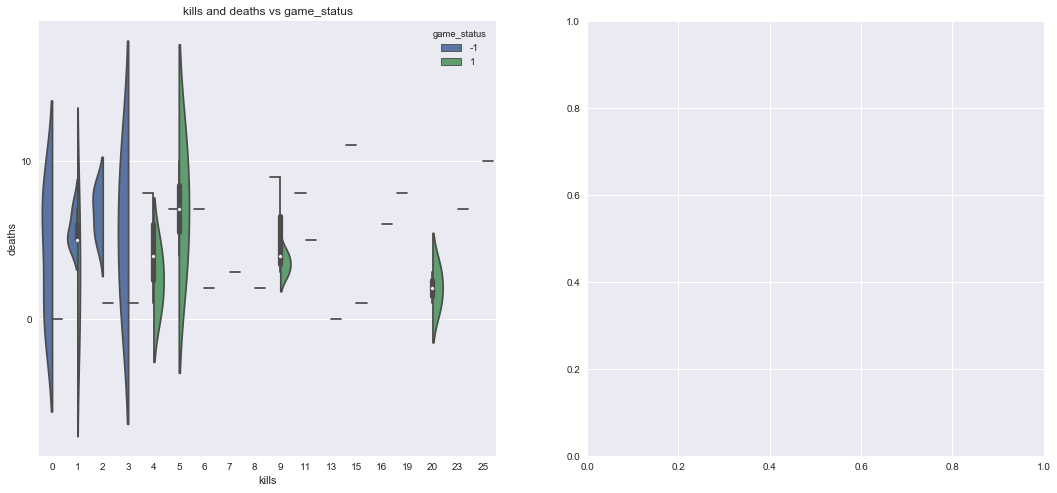

In [302]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("kills","deaths", hue="game_status", data=X_train,split=True,ax=ax[0])
ax[0].set_title('kills and deaths vs game_status')
ax[0].set_yticks(range(0,20,10))
# sns.violinplot("Sex","Age", hue="Survived", data=train,split=True,ax=ax[1])
# ax[1].set_title('Sex and Age vs game_status')
# ax[1].set_yticks(range(0,110,10))
# plt.show()